In [2]:
#libraries
import numpy as np
import libs
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter

In [3]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

In [4]:
Ud = np.array([2.0, 5.0, 10.0])
human_popsize = 10000
sd = 10**(-np.linspace(1, 5, 20))

iterations = 1000
PopulationSize = 10000

Kimetalsd = 0.009
Boykoetalsd = 0.029

Galeotassd_upper = 0.01/2
Galeotassd_lower = 0.0001/2

Charlesworthsd = 0.0001

Chenluetal_noncodingsd = 0.00063

mixedlower_sd = 0.35*Kimetalsd + 0.65*Chenluetal_noncodingsd
mixedupper_sd = 0.35*Boykoetalsd + 0.65*Chenluetal_noncodingsd

In [5]:
mixedupper_sd

0.0105595

In [6]:
Ud_sd_grid = np.meshgrid(Ud, sd)
allUds = Ud_sd_grid[0].flatten()
allsds = Ud_sd_grid[1].flatten()
xmean = allUds/allsds

In [7]:
#Uses expected best individual 
#xmin, std_xmin, xmax, std_xmax = libs.vget_expected_min_max_poisson_sample(xmean, PopulationSize, iterations)
xmin, xmax = libs.vget_median_min_max_poisson_sample(xmean, PopulationSize, iterations)
Wbest = libs.vget_absolute_fitness(xmin, allsds, allUds)

In [8]:
interquantile_folddifference = libs.vget_interquantile_folddifference(xmean, allsds)
Q25improvementoverQ75 = (interquantile_folddifference-1.0)*100

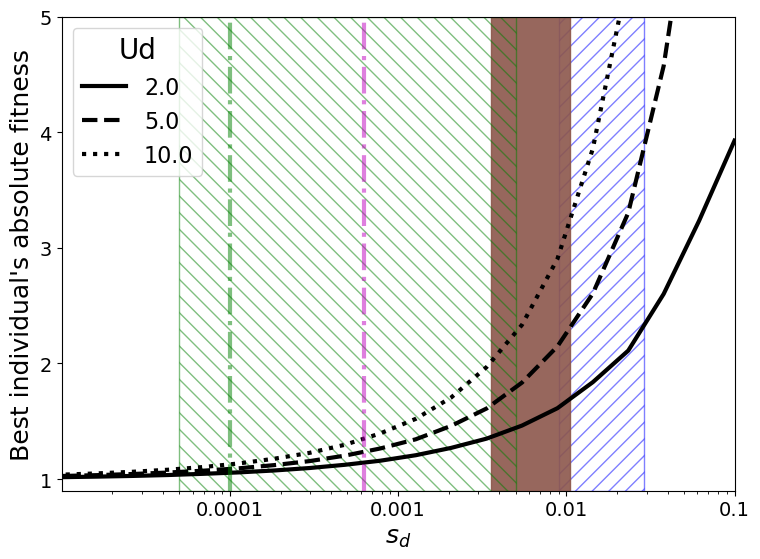

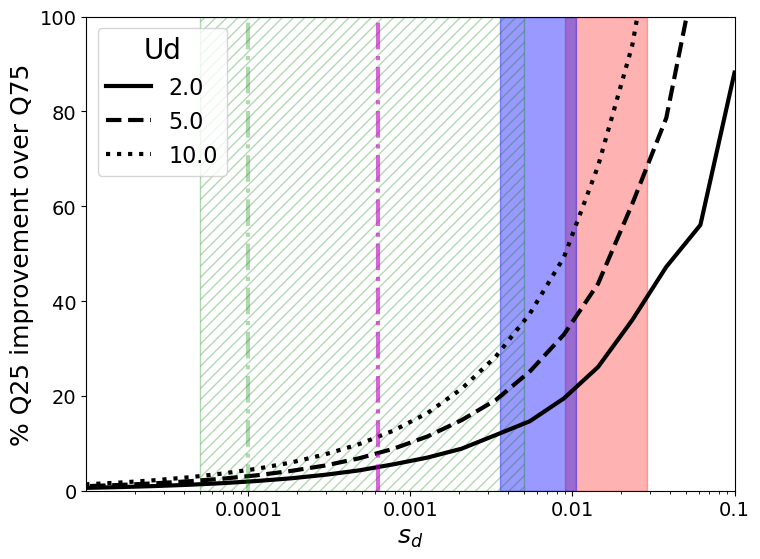

In [15]:
# Combine arrays into a DataFrame
df = pd.DataFrame({
    'Ud': allUds,
    'sd': allsds,
    'Wbest': Wbest,
    'IQFoldDifference': interquantile_folddifference,
    'Q25improvementoverQ75': Q25improvementoverQ75
})

x_values = [0.0001, 0.001, 0.01, 0.1]
x_labels = ['0.0001', '0.001', '0.01', '0.1']

y_values = [1, 2, 3, 4, 5]
y_labels = ['1', '2', '3', '4', '5']

linetypes = ['-', '--', ':']

# Plot using matplotlib, colored by Ud
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
i=0
for Ud_value in df['Ud'].unique():
    subset = df[df['Ud'] == Ud_value]
    plt.plot(subset['sd'], subset['Wbest'], label=f'{Ud_value}', linestyle=linetypes[i], c='black')
    i += 1
plt.xscale('log')
plt.xlabel(r'$s_{d}$')
plt.ylabel('Best individual\'s absolute fitness')
plt.legend(title='Ud')
ax.axvspan(Kimetalsd, Boykoetalsd, color='blue', alpha=0.5, fill=False, hatch='//')
ax.axvspan(mixedlower_sd, mixedupper_sd, color='#8c564b', alpha=0.9)
ax.axvline(x=Chenluetal_noncodingsd, color='m', alpha=0.5, linestyle='-.')
ax.axvspan(Galeotassd_lower, Galeotassd_upper, color='green', alpha=0.5, fill=False, hatch='\\\\')
ax.axvline(x=Charlesworthsd, color='green', alpha=0.5, linestyle='-.')
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.yaxis.set_ticks(y_values)
ax.yaxis.set_ticklabels(y_labels)
ax.set_ylim(0.9, 5)
ax.set_xlim(0.00001, 0.1)
plt.tight_layout()

fig.savefig('graphs/Wbest_Udsd.png', bbox_inches='tight') 
plt.show()
plt.close()

# Plot using matplotlib, colored by Ud
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
i=0
for Ud_value in df['Ud'].unique():
    subset = df[df['Ud'] == Ud_value]
    plt.plot(subset['sd'], subset['Q25improvementoverQ75'], label=f'{Ud_value}', linestyle=linetypes[i], c='black')
    i += 1
plt.xscale('log')
plt.xlabel(r'$s_{d}$')
plt.ylabel('% Q25 improvement over Q75')
plt.legend(title='Ud')
ax.axvspan(Kimetalsd, Boykoetalsd, color='r', alpha=0.3)
ax.axvspan(mixedlower_sd, mixedupper_sd, color='blue', alpha=0.4)
ax.axvline(x=Chenluetal_noncodingsd, color='m', alpha=0.6, linestyle='-.')
ax.axvspan(Galeotassd_lower, Galeotassd_upper, color='green', alpha=0.3, fill=False, hatch='///')
ax.axvline(x=Charlesworthsd, color='green', alpha=0.3, linestyle='-.')
ax.xaxis.set_ticks(x_values)
ax.xaxis.set_ticklabels(x_labels)
ax.set_ylim(0, 100)
ax.set_xlim(0.00001, 0.1)
plt.tight_layout()

fig.savefig('graphs/Q25_improv_Q75.png', bbox_inches='tight') 
plt.show()
plt.close()